Analysis 2. Turns out the TAZ that contains SFO (San Francisco International Airport) is the TAZ that
generates the most trips. find the most popular “deptaz” and save the taz id as sfo_taz. Then split the
dataset into two groups of trips that originated or ended at SFO, and the rest of the trips. What can you say
about these two groups of data? How different they are? (your answers need to be quantitative, based on
some measures or metrics)

In [2]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
taxi = Table().read_table("SF_taxi_data.csv")

In [4]:
refined_data = taxi.where("num", 1).where("fare ($)", are.above(3.5))

In [5]:
refined_data

id,departure time,arrival time,fare ($),num,dep lon,dep lat,arr lon,arr lat,deptaz,arrtaz,dist (miles)
0,9/1/12 0:11,9/1/12 0:20,13.2,1,-122.414,37.8027,-122.421,37.7854,38,30,1.98084
1,9/1/12 0:23,9/1/12 0:31,10.65,1,-122.42,37.7861,-122.435,37.7622,30,94,2.40224
2,9/1/12 0:45,9/1/12 0:49,9,1,-122.415,37.7747,-122.408,37.7826,10,11,0.479348
4,9/1/12 1:09,9/1/12 1:13,7.35,1,-122.43,37.7978,-122.418,37.789,45,32,1.03807
5,9/1/12 1:40,9/1/12 1:52,11.75,1,-122.433,37.7841,-122.411,37.787,77,7,0.960851
6,9/1/12 2:49,9/1/12 2:51,5.15,1,-122.409,37.7856,-122.412,37.791,7,29,0.414315
7,9/1/12 3:29,9/1/12 3:47,43.65,1,-122.403,37.7927,-122.386,37.6181,2,239,14.5105
8,9/1/12 0:33,9/1/12 0:57,46.75,1,-122.387,37.6174,-122.407,37.7889,239,5,14.2747
9,9/1/12 4:39,9/1/12 4:43,6.25,1,-122.422,37.7977,-122.418,37.789,34,31,0.685312
10,9/1/12 1:59,9/1/12 2:05,9.55,1,-122.418,37.791,-122.429,37.7724,32,81,1.59807


In [55]:
sfo_taz= refined_data.group("deptaz").sort("count", descending=True).column(0).item(0)
sfo_taz

239

In [56]:
sf1 = refined_data.where("deptaz", are.equal_to(sfo_taz)).where("arrtaz", are.not_equal_to(sfo_taz))
sf2 = refined_data.where("arrtaz", are.equal_to(sfo_taz))
appended = sf1.append(sf2)
appended

id,departure time,arrival time,fare ($),num,dep lon,dep lat,arr lon,arr lat,deptaz,arrtaz,dist (miles)
8,9/1/12 0:33,9/1/12 0:57,46.75,1,-122.387,37.6174,-122.407,37.7889,239,5,14.2747
88,9/1/12 1:41,9/1/12 2:10,80.85,1,-122.385,37.6154,-122.244,37.7585,239,951,26.2262
89,9/1/12 0:56,9/1/12 1:13,44,1,-122.385,37.6171,-122.403,37.7872,239,12,13.8382
90,9/1/12 0:10,9/1/12 0:29,45.65,1,-122.39,37.6153,-122.424,37.7994,239,34,14.657
100,9/1/12 2:00,9/1/12 2:23,45.85,1,-122.39,37.615,-122.405,37.795,239,0,14.4998
171,9/1/12 1:32,9/1/12 1:49,45.1,1,-122.387,37.6176,-122.409,37.7871,239,7,13.9555
175,9/1/12 0:03,9/1/12 0:32,76.05,1,-122.384,37.6172,-122.275,37.8713,239,1022,25.1365
180,9/1/12 2:15,9/1/12 2:38,70.4,1,-122.385,37.6161,-122.092,37.4125,239,374,22.9241
228,9/1/12 11:08,9/1/12 11:34,44,1,-122.39,37.6155,-122.414,37.7877,239,6,14.1481
244,9/1/12 14:00,9/1/12 14:21,55,1,-122.385,37.6156,-122.409,37.7872,239,7,13.9494


In [57]:
not_sf = refined_data.where("deptaz", are.not_equal_to(sfo_taz)).where("arrtaz", are.not_equal_to(sfo_taz))
not_sf

id,departure time,arrival time,fare ($),num,dep lon,dep lat,arr lon,arr lat,deptaz,arrtaz,dist (miles)
0,9/1/12 0:11,9/1/12 0:20,13.2,1,-122.414,37.8027,-122.421,37.7854,38,30,1.98084
1,9/1/12 0:23,9/1/12 0:31,10.65,1,-122.42,37.7861,-122.435,37.7622,30,94,2.40224
2,9/1/12 0:45,9/1/12 0:49,9,1,-122.415,37.7747,-122.408,37.7826,10,11,0.479348
4,9/1/12 1:09,9/1/12 1:13,7.35,1,-122.43,37.7978,-122.418,37.789,45,32,1.03807
5,9/1/12 1:40,9/1/12 1:52,11.75,1,-122.433,37.7841,-122.411,37.787,77,7,0.960851
6,9/1/12 2:49,9/1/12 2:51,5.15,1,-122.409,37.7856,-122.412,37.791,7,29,0.414315
9,9/1/12 4:39,9/1/12 4:43,6.25,1,-122.422,37.7977,-122.418,37.789,34,31,0.685312
10,9/1/12 1:59,9/1/12 2:05,9.55,1,-122.418,37.791,-122.429,37.7724,32,81,1.59807
11,9/1/12 1:46,9/1/12 1:56,11.75,1,-122.393,37.7789,-122.411,37.7924,109,28,1.77117
12,9/1/12 0:24,9/1/12 0:31,8.45,1,-122.41,37.7879,-122.405,37.798,7,37,1.42192


In [58]:
(appended.num_rows + not_sf.num_rows) == refined_data.num_rows

True

In [59]:
def prediction_lin_r(table, col, slope, intercept):
    x= table.column(col) 
    predictions = slope * x + intercept
    return predictions

In [60]:
x = appended["dist (miles)"]
y = appended["fare ($)"]
theta1 = np.sum(x*(y-np.mean(y)))/np.sum(x*(x-np.mean(x)))
theta2 = -theta1*np.mean(x) + np.mean(y)
theta1, theta2

(3.7040609042815742, -1.2585897932445036)

In [61]:
prediction = prediction_lin_r(appended, "dist (miles)",3.3664289492171582, 5.6245348288279384)
truth = appended.column("fare ($)")
error = truth - prediction

def rmse(error):
    return np.sqrt(np.mean((error)**2))

rmse(error)

9.6773595318560286

In [63]:
append_predict = appended.select("dist (miles)", "fare ($)").with_column("Prediction", prediction).relabeled(1, "Actual")
append_predict

dist (miles),Actual,Prediction
14.2747,46.75,53.6793
26.2262,80.85,93.9131
13.8382,44,52.2097
14.657,45.65,54.9663
14.4998,45.85,54.4369
13.9555,45.1,52.6047
25.1365,76.05,90.2449
22.9241,70.4,82.797
14.1481,44,53.2531
13.9494,55,52.5843


In [64]:
x = not_sf["dist (miles)"]
y = not_sf["fare ($)"]
theta1 = np.sum(x*(y-np.mean(y)))/np.sum(x*(x-np.mean(x)))
theta2 = -theta1*np.mean(x) + np.mean(y)
theta1, theta2

(3.598034586871083, 4.7145483239109414)

In [65]:
prediction = prediction_lin_r(not_sf, "dist (miles)",3.333535544306014, 5.0539072219542511)
truth = not_sf.column("fare ($)")
error = truth - prediction

rmse(error)

3.963724644905013

In [66]:
not_sf_predict = not_sf.select("dist (miles)", "fare ($)").with_column("Prediction", prediction).relabeled(1, "Actual")
not_sf_predict

dist (miles),Actual,Prediction
1.98084,13.2,11.6571
2.40224,10.65,13.0619
0.479348,9,6.65183
1.03807,7.35,8.51435
0.960851,11.75,8.25694
0.414315,5.15,6.43504
0.685312,6.25,7.33842
1.59807,9.55,10.3811
1.77117,11.75,10.9582
1.42192,8.45,9.79392


(None, None)

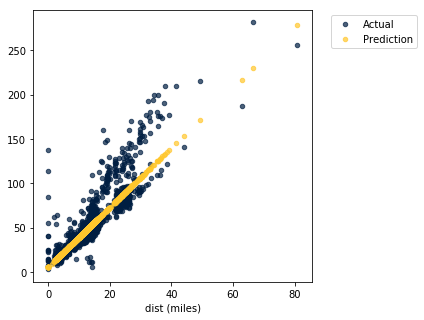

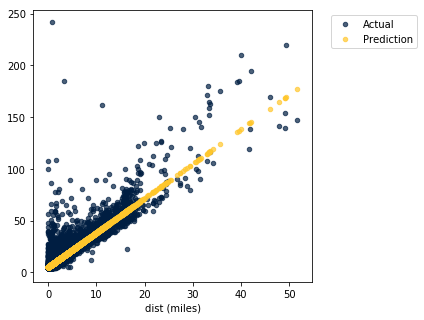

In [68]:
append_predict.scatter(0), not_sf_predict.scatter(0)

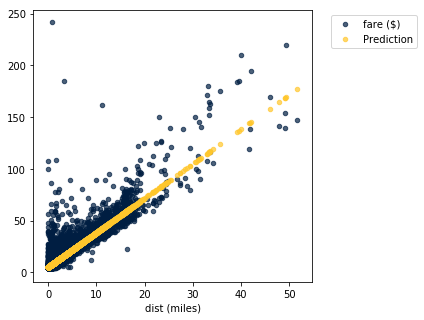

In [41]:
#larger slope in SF data
#data is more concentrated in the non sf data - more variety of trips (differing origins and destinations)
#shorter trips are more concentrated in the non sf data - less non-residents 
#barely any over 50 miles in SF data (trying to get somewhere relatively close to SF otherwie they would have landed in a different airport)

In [23]:
final_table = append_predict.append(not_sf_predict)
final_table

dist (miles),fare ($),Prediction
14.2747,46.75,53.6793
26.2262,80.85,93.9131
13.8382,44,52.2097
14.657,45.65,54.9663
14.4998,45.85,54.4369
13.9555,45.1,52.6047
25.1365,76.05,90.2449
22.9241,70.4,82.797
14.1481,44,53.2531
13.9494,55,52.5843


In [ ]:
final_table 

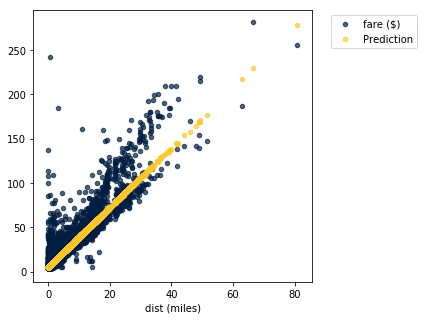

In [24]:
final_table.scatter(0)

In [ ]:
#slope is greater for sf data - makes total sense because there seems to always be more traffic here and taxis can charge more 

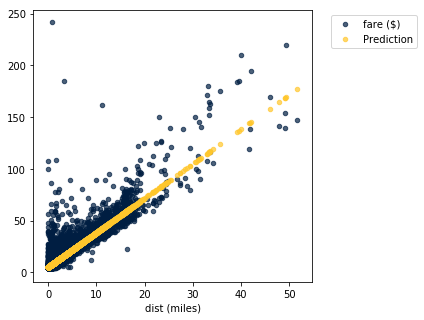

In [25]:
not_sf_predict.scatter(0)

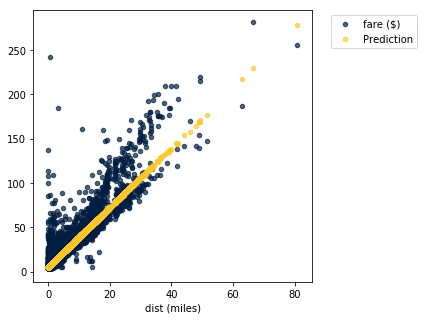

In [26]:
append_predict.scatter(0)

In [82]:
sf_data = make_array((np.mean(append_predict.column(0))),(np.mean(append_predict.column(1))),(np.mean(append_predict.column(2))))

In [81]:
not_sf_data = make_array((np.mean(not_sf_predict.column(0))),(np.mean(not_sf_predict.column(1))),(np.mean(not_sf_predict.column(2))))

In [89]:
means = Table().with_columns("Mean Measurements", ["dist (miles)", "Actual", "Predicted"],"SF Data", sf_data, "Not SF Data", not_sf_data)
means

Mean Measurements,SF Data,Not SF Data
dist (miles),13.6373,2.14183
Actual,49.2549,12.4209
Predicted,51.5336,12.1938


In [86]:
sf_data_std = make_array((np.std(append_predict.column(0))),(np.std(append_predict.column(1))),(np.std(append_predict.column(2))))

In [87]:
not_sf_data_std = make_array((np.std(not_sf_predict.column(0))),(np.std(not_sf_predict.column(1))),(np.std(not_sf_predict.column(2))))

In [90]:
std = Table().with_columns("SD Measurements", ["dist (miles)", "Actual", "Predicted"],"SF Data", sf_data_std, "Not SF Data", not_sf_data_std)
std

SD Measurements,SF Data,Not SF Data
dist (miles),4.10466,2.21794
Actual,17.8241,8.88815
Predicted,13.8181,7.39357
